In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Adjust the path if needed
df = pd.read_csv('data/raw2/hotelrec_full_combined.csv')

# Quick look
print(df.shape)
df.head()

(50264531, 12)


,hotel_id,hotel_name,hotel_location,date,rating,sentiment_score,sleep quality,value,rooms,service,cleanliness,location
0,1121769,Hotel Baltic,Giulianova Province of Teramo Abruzzo,2019-01,5.0,0.341327,NaN,NaN,NaN,NaN,NaN,NaN
1,1121769,Hotel Baltic,Giulianova Province of Teramo Abruzzo,2016-01,5.0,0.272183,NaN,NaN,NaN,NaN,NaN,NaN
2,1121769,Hotel Baltic,Giulianova Province of Teramo Abruzzo,2014-10,5.0,0.475000,NaN,5.0,NaN,5.0,NaN,5.0
3,1121769,Hotel Baltic,Giulianova Province of Teramo Abruzzo,2014-08,5.0,0.623636,5.0,NaN,NaN,5.0,5.0,NaN
4,1121769,Hotel Baltic,Giulianova Province of Teramo Abruzzo,2013-08,4.0,0.218607,3.0,4.0,4.0,5.0,3.0,4.0


In [3]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50264531 entries, 0 to 50264530
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   hotel_id         int64  
 1   hotel_name       object 
 2   hotel_location   object 
 3   date             object 
 4   rating           float64
 5   sentiment_score  float64
 6   sleep quality    float64
 7   value            float64
 8   rooms            float64
 9   service          float64
 10  cleanliness      float64
 11  location         float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.5+ GB


In [4]:
# --- Check Missing Values ---
missing_counts = df.isnull().sum()
missing_counts
print(missing_counts[missing_counts > 0])  # Only display columns with missing values
print()

hotel_location          20
sleep quality     27672279
value             23877794
rooms             24847780
service           14691088
cleanliness       23858431
location          24743058
dtype: int64



In [5]:
missing_location_df = df[df['hotel_location'].isnull()]
missing_location_df

,hotel_id,hotel_name,hotel_location,date,rating,sentiment_score,sleep quality,value,rooms,service,cleanliness,location
19399157,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2018-08,4.0,0.321726,NaN,NaN,NaN,NaN,NaN,NaN
19399158,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2018-07,3.0,0.023830,NaN,NaN,NaN,NaN,NaN,NaN
19399159,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2018-03,5.0,0.314444,NaN,5.0,NaN,5.0,NaN,5.0
19399160,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2017-08,4.0,0.375000,NaN,NaN,NaN,NaN,NaN,NaN
19399161,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2017-07,4.0,0.408333,NaN,NaN,NaN,5.0,4.0,5.0
19399162,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2016-09,5.0,0.538750,NaN,5.0,NaN,5.0,5.0,NaN
19399163,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2016-08,4.0,0.135859,NaN,NaN,NaN,NaN,NaN,NaN
19399164,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2016-07,5.0,0.190625,NaN,NaN,NaN,NaN,NaN,NaN
19399165,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2016-07,4.0,0.228039,NaN,NaN,NaN,NaN,NaN,NaN
19399166,577223,Riviere du Loup Municipal Campground Camping M...,NaN,2015-09,4.0,0.300595,4.0,5.0,NaN,4.0,NaN,NaN


In [6]:
# Drop rows where hotel_location is missing
df = df.dropna(subset=['hotel_location'])

# Confirm
print(df.shape)

(50264511, 12)


In [7]:
# Basic statistics for numerical columns
df.describe()

,hotel_id,rating,sentiment_score,sleep quality,value,rooms,service,cleanliness,location
count,5.026451e+07,5.026451e+07,5.026451e+07,2.259225e+07,2.638673e+07,2.541675e+07,3.557343e+07,2.640610e+07,2.552147e+07
mean,1.691103e+06,4.154976e+00,3.016182e-01,4.208617e+00,4.118084e+00,4.121314e+00,4.288368e+00,4.331538e+00,4.402420e+00
std,2.692161e+06,1.123866e+00,1.904167e-01,1.080525e+00,1.127532e+00,1.097153e+00,1.090619e+00,1.032438e+00,8.793799e-01
min,7.217900e+04,1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.369520e+05,4.000000e+00,1.962963e-01,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
50%,5.943440e+05,5.000000e+00,3.124306e-01,5.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
75%,1.723863e+06,5.000000e+00,4.236111e-01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
max,1.671230e+07,5.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [8]:
# See all column names
print(df.columns.tolist())

['hotel_id', 'hotel_name', 'hotel_location', 'date', 'rating', 'sentiment_score', 'sleep quality', 'value', 'rooms', 'service', 'cleanliness', 'location']


In [9]:
df['rating'].describe()
df[df['rating'] > 5]

,hotel_id,hotel_name,hotel_location,date,rating,sentiment_score,sleep quality,value,rooms,service,cleanliness,location


In [10]:
df.head

<bound method NDFrame.head of           hotel_id                            hotel_name  \
0          1121769                          Hotel Baltic   
1          1121769                          Hotel Baltic   
2          1121769                          Hotel Baltic   
3          1121769                          Hotel Baltic   
4          1121769                          Hotel Baltic   
...            ...                                   ...   
50264526    240221  Chart House Suites On Clearwater Bay   
50264527    240221  Chart House Suites On Clearwater Bay   
50264528    240221  Chart House Suites On Clearwater Bay   
50264529    240221  Chart House Suites On Clearwater Bay   
50264530    240221  Chart House Suites On Clearwater Bay   

                                 hotel_location     date  rating  \
0         Giulianova Province of Teramo Abruzzo  2019-01     5.0   
1         Giulianova Province of Teramo Abruzzo  2016-01     5.0   
2         Giulianova Province of Teramo Abruz

In [ ]:
# Save cleaned version
df.to_csv('data/raw2/hotelrec_full_cleaned.csv', index=False) # 3m 11s

In [ ]:
# Compress
df.to_csv('data/raw2/hotelrec_full_cleaned.csv.gz', index=False, compression='gzip')

In [12]:
#  Count number of unique hotels
df['hotel_id'].nunique()

365011

In [13]:
# Find top 10 hotel_ids by number of reviews
top_hotels_counts = df['hotel_id'].value_counts().head(10)

# Get hotel_id -> hotel_name mapping
hotel_info = df[['hotel_id', 'hotel_name']].drop_duplicates(subset='hotel_id')

# Merge counts with hotel names
top_hotels = top_hotels_counts.reset_index()
top_hotels.columns = ['hotel_id', 'review_count']

# Merge with hotel_info to get hotel names
top_hotels = top_hotels.merge(hotel_info, on='hotel_id', how='left')

# Display
top_hotels[['hotel_id', 'hotel_name', 'review_count']]

,hotel_id,hotel_name,review_count
0,278011,Embassy Suites by Hilton Niagara Falls Fallsvi...,10338
1,219161,Sensimar Resort Riviera Maya,10292
2,1209793,Center Parcs Whinfell Forest,10192
3,523986,Center Parcs Longleat Forest,10135
4,583034,Paradisus Palma Real Golf Spa Resort,10078
5,181641,Sandals Royal Bahamian Spa Resort Offshore Island,10035
6,2627483,Secrets The Vine Cancun,9478
7,503104,Grand Bahia Principe Tulum,9409
8,243420,Sofitel London Gatwick Hotel,9408
9,147627,Breezes Resort Spa Bahamas,8837


In [14]:
# Extract year from the 'date' column (which is in YYYY-MM)
df['year'] = df['date'].str[:4]

# Group by year and count
reviews_per_year = df['year'].value_counts().sort_index()

reviews_per_year

year
2001        227
2002       5769
2003      40491
2004     101611
2005     176002
2006     271538
2007     400361
2008     531618
2009     854978
2010    1230397
2011    2079546
2012    3363249
2013    4687609
2014    5662245
2015    7025497
2016    8105306
2017    7486139
2018    6408357
2019    1833571
Name: count, dtype: int64

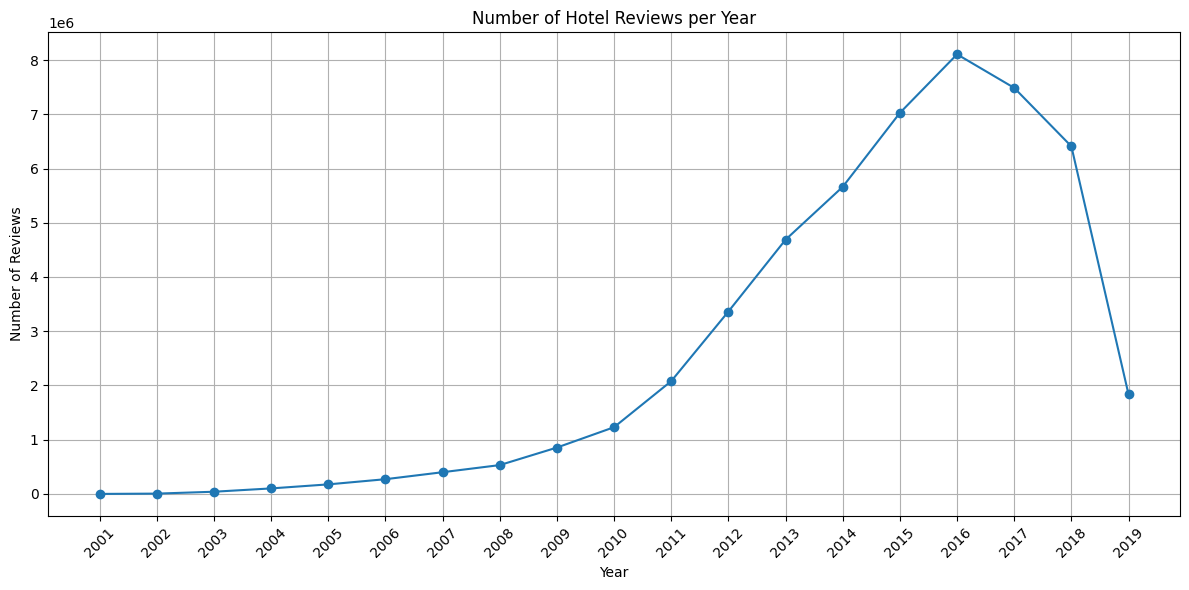

In [15]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12,6))
plt.plot(reviews_per_year.index, reviews_per_year.values, marker='o')
plt.title('Number of Hotel Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()